In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
dec_fraude = pd.read_csv('C:/Users/maria/OneDrive/Escritorio/pontia/Final/dec_fraude.csv')

In [3]:
dec_fraude.drop('Unnamed: 0', axis=1, inplace=True)

In [4]:
dec_fraude.head(5)

,t_id,tipo,tiempo,monto,cl_origen,cl_destino,es_fraude,mensaje_alarma,balance_prev_or,balance_post_or,balance_prev_des,balance_post_des
0,0,PAYMENT,2022-09-01 07:00:00,9839.64,C1231006815,M1979787155,0,No,170136.0,160296.36,0.0,0.0
1,1,PAYMENT,2022-09-01 07:00:00,1864.28,C1666544295,M2044282225,0,No,21249.0,19384.72,0.0,0.0
2,2,TRANSFER,2022-09-01 07:00:00,181.00,C1305486145,C553264065,1,No,181.0,0.00,0.0,0.0
3,3,CASH_OUT,2022-09-01 07:00:00,181.00,C840083671,C38997010,1,No,181.0,0.00,21182.0,0.0
4,4,PAYMENT,2022-09-01 07:00:00,11668.14,C2048537720,M1230701703,0,No,41554.0,29885.86,0.0,0.0


In [19]:
dec_fraude['tipo'].unique()

array(['PAYMENT', 'TRANSFER', 'CASH_OUT', 'DEBIT', 'CASH_IN'],
      dtype=object)

In [21]:
# Categorizamos la columna tipo
mapeo = {'PAYMENT': 0, 'TRANSFER': 1, 'CASH_OUT': 2, 'DEBIT': 3, 'CASH_IN': 4}
dec_fraude['tipo_cod'] = dec_fraude['tipo'].map(mapeo)

In [26]:
# Hacemos un estudio de correlacion
corr_matrix = dec_fraude.corr()

C:\Users\maria\AppData\Local\Temp\ipykernel_25524\1524513944.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = dec_fraude.corr()


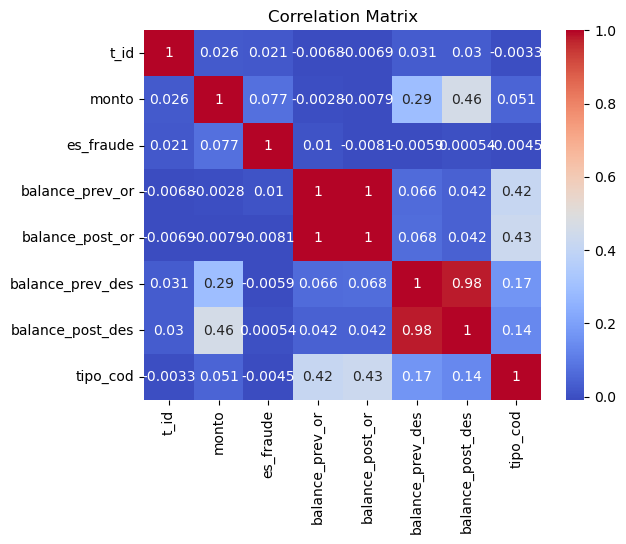

In [23]:
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

In [32]:
# Seleccionamos las columnas que vamos a introducir al dataset y el ground truth
X = dec_fraude[['monto','balance_prev_or','balance_post_des', 'tipo_cod']]
Y = dec_fraude[['es_fraude']]

In [33]:
# Modelo supervisado
# Normalizar datos
# Particion train y test
# Diseño del algoritmo
# Evaluacion del modelo

In [34]:
# Aplicamos la normalizacion min-max
from sklearn.preprocessing import MinMaxScaler
min_max_scaler = MinMaxScaler()
X_norm = min_max_scaler.fit_transform(X.values)
X_norm = pd.DataFrame(X_norm)
X_norm.head()

,0,1,2,3
0,0.000106,0.002855,0.0,0.00
1,0.000020,0.000357,0.0,0.00
2,0.000002,0.000003,0.0,0.25
3,0.000002,0.000003,0.0,0.50
4,0.000126,0.000697,0.0,0.00


In [138]:
new_dat = pd.concat([X_norm, Y], axis=1)
new_dat

,0,1,2,3,es_fraude
0,0.000106,0.002855,0.000000,0.00,0
1,0.000020,0.000357,0.000000,0.00,0
2,0.000002,0.000003,0.000000,0.25,1
3,0.000002,0.000003,0.000000,0.50,1
4,0.000126,0.000697,0.000000,0.00,0
...,...,...,...,...,...
6362515,0.003674,0.005701,0.000954,0.50,1
6362516,0.068272,0.105923,0.000000,0.25,1
6362517,0.068272,0.105923,0.017912,0.50,1
6362518,0.009195,0.014265,0.000000,0.25,1


In [200]:
# Dividir los datos en conjuntos de entrenamiento y prueba
# Probar con 50000 datos sin fraude y 6000 con fraude
train = new_dat.groupby('es_fraude').apply(lambda x: x.sample(n=6000, random_state=42)).reset_index(drop=True)
test = pd.concat([new_dat, train]).drop_duplicates(keep=False).reset_index(drop=True)

In [201]:
u_train_x = train[[0, 1, 2, 3]]
u_test_x = test[[0, 1, 2, 3]]
u_train_y = train['es_fraude']
u_test_y = test['es_fraude']

In [202]:
# Estrategias para balancear las clases
# Undersampling
# Aplicar pesos a la red (Redes de neuronas)
# Aplicar validacion cruzada
# Reducir el threshold de clase (regresion logistica)
# Aplicar SMOTE
# https://academic.oup.com/bib/article/14/1/13/304457?login=false

In [203]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense 
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [204]:
# Creamos el modelo (perceptron multicapa)
model = Sequential(
    [
    Dense(4, input_dim=X_train.shape[1], activation='selu'),
    Dense(16 , activation='selu'), 
    Dense(8, activation='selu'),
    Dense(4, activation='selu'),
    Dense(1, activation='sigmoid')
    ]
)

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [205]:
model.summary()

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_52 (Dense)            (None, 4)                 20        
                                                                 
 dense_53 (Dense)            (None, 16)                80        
                                                                 
 dense_54 (Dense)            (None, 8)                 136       
                                                                 
 dense_55 (Dense)            (None, 4)                 36        
                                                                 
 dense_56 (Dense)            (None, 1)                 5         
                                                                 
Total params: 277
Trainable params: 277
Non-trainable params: 0
_________________________________________________________________


In [207]:
# Entrenamos el modelo
history = model.fit(u_train_x, u_train_y, shuffle=True, epochs=100, batch_size=16)

Epoch 1/100
750/750 [==============================] - 0s 480us/step - loss: 0.1518 - accuracy: 0.9385
Epoch 2/100
750/750 [==============================] - 0s 462us/step - loss: 0.1510 - accuracy: 0.9374
Epoch 3/100
750/750 [==============================] - 0s 482us/step - loss: 0.1442 - accuracy: 0.9421
Epoch 4/100
750/750 [==============================] - 0s 462us/step - loss: 0.1435 - accuracy: 0.9409
Epoch 5/100
750/750 [==============================] - 0s 462us/step - loss: 0.1386 - accuracy: 0.9451
Epoch 6/100
750/750 [==============================] - 0s 457us/step - loss: 0.1351 - accuracy: 0.9470
Epoch 7/100
750/750 [==============================] - 0s 479us/step - loss: 0.1383 - accuracy: 0.9447
Epoch 8/100
750/750 [==============================] - 0s 475us/step - loss: 0.1323 - accuracy: 0.9488
Epoch 9/100
750/750 [==============================] - 0s 477us/step - loss: 0.1289 - accuracy: 0.9494
Epoch 10/100
750/750 [==============================] - 0s 485us/step - l

In [208]:
prediction = model.predict(X_test)
prediction = np.round(prediction)

59649/59649 [==============================] - 19s 318us/step


In [209]:
def plot_curves(history):
    accuracy = history.history['accuracy']
    val_accuracy = history.history['val_accuracy']
    loss = history.history['loss']
    val_loss = history.history['val_loss']

    epochs = range(1, len(accuracy) + 1)

    # Grafica de la precisión de entrenamiento y validación
    plt.figure(figsize=(12, 4))
    plt.subplot(1, 2, 1)
    plt.plot(epochs, accuracy, 'b', label='Training Accuracy')
    plt.plot(epochs, val_accuracy, 'r', label='Validation Accuracy')
    plt.title('Training and Validation Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()

    # Grafica de la pérdida de entrenamiento y validación
    plt.subplot(1, 2, 2)
    plt.plot(epochs, loss, 'b', label='Training Loss')
    plt.plot(epochs, val_loss, 'r', label='Validation Loss')
    plt.title('Training and Validation Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()

    plt.tight_layout()
    plt.show()

In [173]:
plot_curves(history)

KeyError: 'val_accuracy'

In [210]:
from sklearn.metrics import confusion_matrix
def metrics(y_true, y_pred):
    tn, fp, fn, tp = confusion_matrix(y_true, y_pred).ravel()
    specificity = tn / (tn+fp)
    sensitivity = tp / (tp+fn)
    precision = tp / (tp+fp)
    print('Especificidad: {:.2f}'.format(specificity))
    print('Sensibilidad: {:.2f}'.format(sensitivity))
    print('Precision: {:.2f}'.format(precision))
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(10, 10))
    sns.heatmap(cm, annot=True, fmt="d", cmap='RdPu')
    plt.title("Confusion matrix")
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

Especificidad: 0.96
Sensibilidad: 1.00
Precision: 0.03


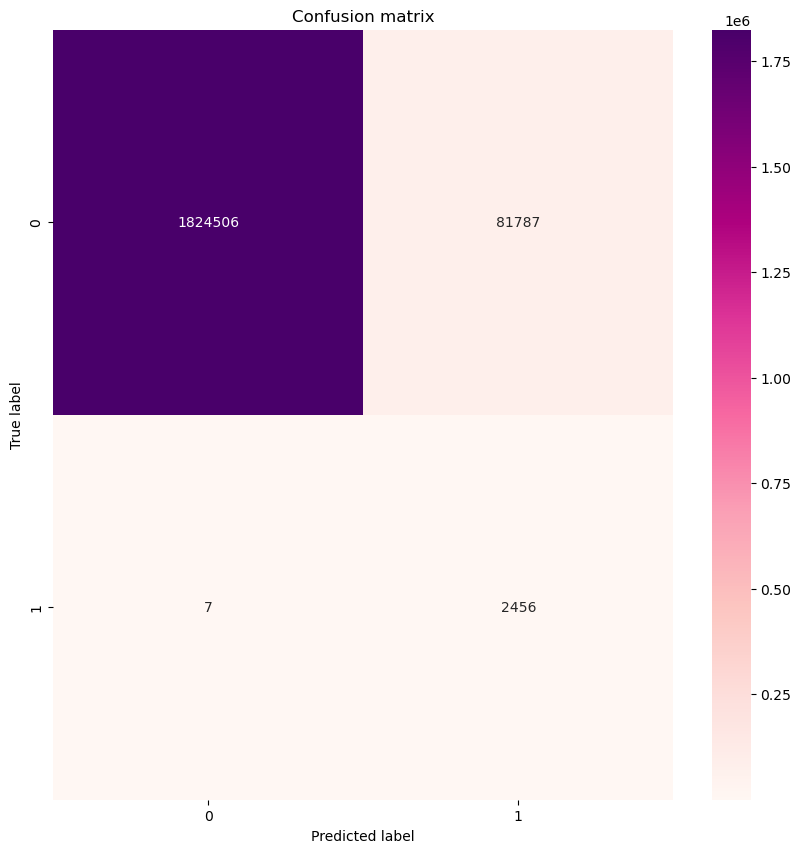

In [211]:
metrics(y_test, prediction)

In [176]:
from sklearn.linear_model import LogisticRegression

# Crear una instancia del modelo de regresión logística
model = LogisticRegression()

# Entrenar el modelo
model.fit(X_train, y_train)

# Modificar el umbral de clasificación de la clase 1 (por ejemplo, a 0.7)
class_threshold = 0.95
model.classes_ = [0, 1]
model.coef_ = model.coef_
model.intercept_ = model.intercept_
model.threshold_ = class_threshold

# Predecir las etiquetas de los datos de entrenamiento
y_pred = model.predict(X_test)
y_pred = (y_pred > class_threshold).astype(int)

# Calcular el accuracy en el conjunto de entrenamiento
accuracy = model.score(X_test, y_test)

# Imprimir el accuracy
print("Training Accuracy:", accuracy)



C:\Users\maria\anaconda3\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Training Accuracy: 0.9986996766480367


Especificidad: 1.00
Sensibilidad: 0.00
Precision: 0.12


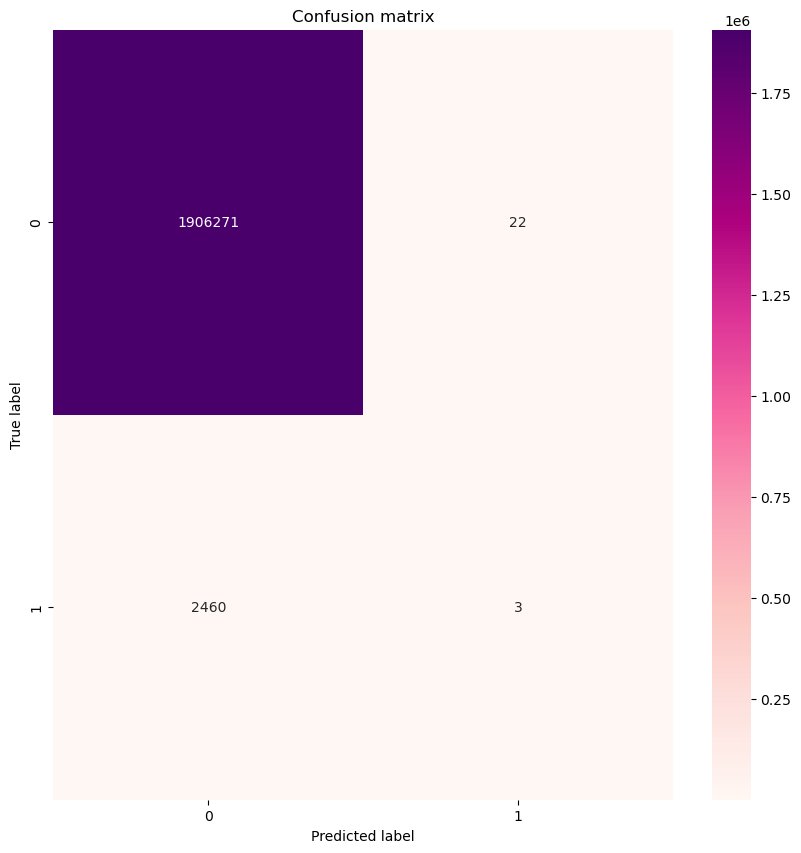

In [177]:
metrics(y_test, y_pred)

1.3097535777228729e-05